<a href="https://colab.research.google.com/github/SylGrafe/lab1Repo/blob/master/colab_CNN02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colab_CNN02 ,regulation , data augmentation ,   explanations :
https://github.com/SylGrafe/lab1Repo/blob/master/lab1Sygr0003.pdf



fatal: destination path 'lab1Lib' already exists and is not an empty directory.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
train  model 32_64_64 for fashion NMIST classification
10000/10000 [==============================] - 1s 140us/step

************* testRes:[0.2259022316813469, 0.9229] ************ 

saving on colab_CNN02.json  the model config and  results 
(colab_CNN02 32_64_64 ,z=0.01 ,rot=7  at:3003_1230 
testRes:[0.2259, 0.9229]
compInfo: adam, categorical_crossentropy
info:drop out :True data aug:True wind:(5, 5)  

{'val_loss': [0.3108, 0.2845, 0.2384, 0.2465, 0.2097, 0.2308, 0.2354, 0.2062, 0.2256, 0.1877, 0.239, 0.2032], 'val_acc': [0.8809, 0.892, 0.9128, 0.907, 0.9222, 0.9117, 0.9078, 0.9165, 0.9156, 0.9322, 0.9178, 0.9281], 'loss': [0.5115, 0.3315, 0.2878, 0.2699, 0.2467, 0.233, 0.2211, 0.2085, 0.2032, 0.1908, 0.1839, 0.1793], 'acc': [0.8112, 0.8772, 0.8939, 0.8993, 0.9087, 0.9132, 0.9178, 0.9214, 0.

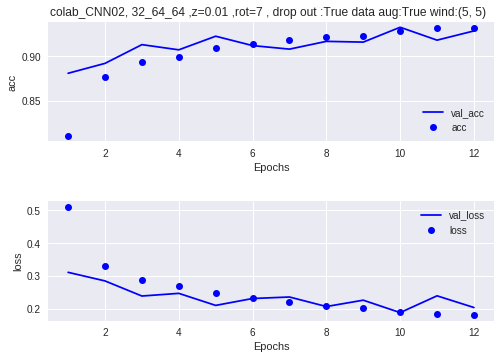

************ dumpOnFile () : append to file  colab_CNN02.json  

 Dumping object 32_64_64 ,z=0.01 ,rot=7  in the file  colab_CNN02.json 
 _3003_123452 duration: h:0 mn:4 sec:12 


In [23]:
import keras
import numpy as np
keras.__version__
import sys
import datetime
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

# lab1Utils.py is expected to be in the 
# https://github.com/SylGrafe/lab1Lib.git
!git clone https://github.com/SylGrafe/lab1Lib.git
import sys
sys.path.insert(0, "lab1Lib")
import lab1Utils


CAndR = lab1Utils.ConfigAndResults


modelStruct="32_64_64"
optimizerStr = 'adam'
lossStr = 'categorical_crossentropy'

theDumpFileName = "colab_CNN02.json"
codeRef="colab_CNN02"

compInfoStr= optimizerStr + ", " + lossStr
startTime= datetime.datetime.now()

# after 6 epochs the model seem to overfit
myEpochs=12
myBs=64

theModel = models.Sequential()
myPadding='same'
myWind=(5,5)


doDropout=True

theModel.add(layers.Conv2D(32, myWind,   padding=myPadding,                           
        activation='relu', input_shape=(28, 28, 1)))
theModel.add(layers.MaxPooling2D((2, 2)))
theModel.add(layers.Conv2D(64, myWind, padding=myPadding ,
         activation='relu'))
                           
theModel.add(layers.MaxPooling2D((2, 2)))
theModel.add(layers.Conv2D(64, myWind, padding=myPadding , 
     activation='relu'))
if (doDropout):
  theModel.add(Dropout(0.5))

  
theModel.add(layers.Flatten())
theModel.add(layers.Dense(64, activation='relu'))
theModel.add(layers.Dense(10, activation='softmax'))


#theModel.summary()


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)




# now set-aside 10% of the train_images/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_images))

# first pick validation set from train_images/labels
val_data = train_images[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_images2 = train_images[val_count:,:]
train_labels2 = train_labels[val_count:,:]


theModel.compile(optimizer=optimizerStr,
              loss=lossStr,
              metrics=['accuracy'])


print ("train  model %s for fashion NMIST classification" % modelStruct )

doDataAug = True
myValidationSteps =50
infoStr= "drop out :%s data aug:%s wind:%s  " % (
    doDropout ,  doDataAug , myWind)

# try several zoom and rot values
if (doDataAug):
  myZoom=0.01
  myRot=7
  modelStruct +=" ,z=%.2f ,rot=%d " % (myZoom , myRot)

  train_datagen = ImageDataGenerator(
      featurewise_center=False,
      featurewise_std_normalization=False,
      rotation_range=myRot,
      zoom_range = myZoom,
      width_shift_range = 0,
      height_shift_range=0,
      shear_range=0,
      horizontal_flip=False,
      fill_mode='nearest')

    #train_datagen.fit(train_images2)
  
  # Note that the validation data should not be augmented!
  
  val_datagen = ImageDataGenerator()

  
  train_generator=   train_datagen.flow(
      train_images2, train_labels2, batch_size=myBs)
  
  val_generator = val_datagen.flow (
      val_data, val_labels, batch_size=myBs)
  
  theFit = theModel.fit_generator(
      train_generator ,   verbose=0 , epochs=myEpochs,
      steps_per_epoch=len(train_images)/myBs, 
      validation_data= val_generator ,
      validation_steps=myValidationSteps)   
                        


else:
  theFit= theModel.fit (train_images2, train_labels2, 
    epochs=myEpochs , verbose=0, batch_size=myBs,   
    validation_data=(val_data, val_labels))


              
testRes = theModel.evaluate(test_images, test_labels)
print ("\n************* testRes:%s ************ \n" % (  testRes))



# save the results on disk
print ("saving on %s  the model config and  results " % (theDumpFileName))

res= CAndR (modelStruct ,compInfoStr , theFit.history ,  theFit.params , 
 startTime.strftime("%d%m_%H%M")  , testRes= testRes , 
            codeRef=codeRef , info=infoStr)


print(res.toString())
lab1Utils.plotHist (res )
lab1Utils.dumpOnFile (res , theDumpFileName)




stopTime = datetime.datetime.now()
duration = stopTime - startTime
seconds = duration.total_seconds()
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60
theName =  stopTime.strftime("_%d%m_%H%M%S") 
print ( " %s duration: h:%d mn:%d sec:%d " % 
(   theName , hours , minutes , seconds))



In [0]:
from google.colab import files
files.download(theDumpFileName)



In [25]:
!ls colab_CNN02.json

colab_CNN02.json


endnotebook
